Examples of train set:
tensor([0, 1, 2, 2, 2, 1, 0, 1, 2, 1])
torch.Size([18012, 1, 28, 28])


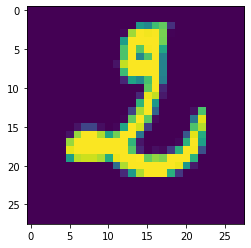

tensor(254., device='cuda:0')


In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import numpy as np
import copy
from model import Model
from Optimization_Method import projection_simplex_sort as pj
import pickle
import matplotlib.pyplot as plt
import random
#example of pickle
# l = [1,2,3,4]
# with open("test", "wb") as fp:   #Pickling
#     pickle.dump(l, fp)

# with open("test", "rb") as fp:   # Unpickling
#     b = pickle.load(fp)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.get_device_name(0)

data_name = 'MNIST'
#data_name = 'F-MNIST'
#data_name = 'CIFAR10'
data_path = './data/'+ data_name +'.py'
exec(open(data_path).read())

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(train_set.data[58].cpu())

epoch_number = 18000
max_epoch = 100
b,b_1,q = 3000,200,200 #:good for MNIST
sim_time = 30
print(torch.max(train_set.data[17511][0][16]))

SAPD Variance Reduction Method

In [2]:
# b,b_1,q,m = 3000,100,100,10
# max_epoch = 20
# sim_time = 1
torch.manual_seed(2)
from algorithms import SAPD_VR
SAPD_VR(train_set = train_set,data_name = data_name,
      max_epoch=max_epoch,epoch_numer=epoch_number,
      b = b, b_1 = b_1, q = q,
       lr_x0=0.005, lr_y = 0.00001, theta0=0.8, theta_rate= 1.001,sim_time=sim_time,
       is_save_data=True, is_show_result=True)

sample complexity is 25200 , epoch is 1 , acc is tensor(0.9532, device='cuda:0') , loss is 3.0191274
sample complexity is 43400 , epoch is 2 , acc is tensor(0.9618, device='cuda:0') , loss is 2.996621
sample complexity is 63200 , epoch is 3 , acc is tensor(0.9638, device='cuda:0') , loss is 2.9858935
sample complexity is 73800 , epoch is 4 , acc is tensor(0.9622, device='cuda:0') , loss is 2.9915864
sample complexity is 96800 , epoch is 5 , acc is tensor(0.9728, device='cuda:0') , loss is 2.9680898
sample complexity is 109400 , epoch is 6 , acc is tensor(0.9763, device='cuda:0') , loss is 2.9627998
sample complexity is 136200 , epoch is 7 , acc is tensor(0.9770, device='cuda:0') , loss is 2.9579375
sample complexity is 149600 , epoch is 8 , acc is tensor(0.9787, device='cuda:0') , loss is 2.9519923
sample complexity is 163000 , epoch is 9 , acc is tensor(0.9746, device='cuda:0') , loss is 2.9522514
sample complexity is 189800 , epoch is 10 , acc is tensor(0.9777, device='cuda:0') , los

SMDA Variance Reduction Method

In [2]:
# b,b_1,q = 1000,20,20
# max_epoch = 50

torch.manual_seed(2)
from algorithms import SMDA_VR
SMDA_VR(train_set = train_set,data_name = data_name,
      max_epoch=max_epoch,epoch_numer=epoch_number,
      b = b, b_1 = b_1, q = q,sim_time=sim_time,
       lr_x=0.001, lr_y = 0.00001,rho = 1,
       is_save_data=True, is_show_result=True)

sample complexity is 18000 , epoch is 1 , acc is tensor(0.8976, device='cuda:0') , loss is 3.0689046
sample complexity is 36000 , epoch is 2 , acc is tensor(0.9378, device='cuda:0') , loss is 3.0355883
sample complexity is 54000 , epoch is 3 , acc is tensor(0.9514, device='cuda:0') , loss is 3.0202193
sample complexity is 72000 , epoch is 4 , acc is tensor(0.9521, device='cuda:0') , loss is 3.016173
sample complexity is 90000 , epoch is 5 , acc is tensor(0.9528, device='cuda:0') , loss is 3.0111156
sample complexity is 108000 , epoch is 6 , acc is tensor(0.9569, device='cuda:0') , loss is 3.002746
sample complexity is 126000 , epoch is 7 , acc is tensor(0.9593, device='cuda:0') , loss is 2.9995909
sample complexity is 144000 , epoch is 8 , acc is tensor(0.9645, device='cuda:0') , loss is 2.9915538
sample complexity is 162000 , epoch is 9 , acc is tensor(0.9662, device='cuda:0') , loss is 2.9880452
sample complexity is 180000 , epoch is 10 , acc is tensor(0.9656, device='cuda:0') , loss

SREDA

In [3]:
# max_epoch = 50
torch.manual_seed(2)
from algorithms import SREDA
SREDA(train_set = train_set,data_name = data_name,
      max_epoch=max_epoch,epoch_numer=epoch_number,sim_time=sim_time,
      b = b, b_1 = b_1, q = 10, m=10,
       lr_x=0.01, lr_y = 0.00001,
       is_save_data=True, is_show_result=True)

sample complexity is 19800 , epoch is 1 , acc is tensor(0.8179, device='cuda:0') , loss is 3.1377618
sample complexity is 37200 , epoch is 2 , acc is tensor(0.8909, device='cuda:0') , loss is 3.1013443
sample complexity is 54000 , epoch is 3 , acc is tensor(0.8768, device='cuda:0') , loss is 3.1054785
sample complexity is 73800 , epoch is 4 , acc is tensor(0.9207, device='cuda:0') , loss is 3.0555525
sample complexity is 91200 , epoch is 5 , acc is tensor(0.9433, device='cuda:0') , loss is 3.0325422
sample complexity is 108000 , epoch is 6 , acc is tensor(0.9483, device='cuda:0') , loss is 3.0252132
sample complexity is 127800 , epoch is 7 , acc is tensor(0.9530, device='cuda:0') , loss is 3.015861
sample complexity is 145200 , epoch is 8 , acc is tensor(0.9587, device='cuda:0') , loss is 3.0074518
sample complexity is 162000 , epoch is 9 , acc is tensor(0.9580, device='cuda:0') , loss is 3.006093
sample complexity is 181800 , epoch is 10 , acc is tensor(0.9645, device='cuda:0') , loss

KeyboardInterrupt: 